In [1]:
import pandas as pd         
import numpy as np           
import matplotlib.pyplot as plt  
import seaborn as sns         
from datetime import datetime  

In [2]:
file_path = ""

df_2009_2010 = pd.read_excel(file_path, sheet_name="Year 2009-2010")
df_2010_2011 = pd.read_excel(file_path, sheet_name="Year 2010-2011")

# Combine the two dataframes
df = pd.concat([df_2009_2010, df_2010_2011])

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [3]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [4]:
df.shape

(1067371, 8)

# To find the missing data

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

# Handling missing data

In [7]:
df['Description'].fillna('No Description', inplace=True)

In [9]:
df['Customer ID'].fillna('Unknown', inplace=True)

In [11]:
# Verify
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

# Sales Trend Analysis - Seasonal growth

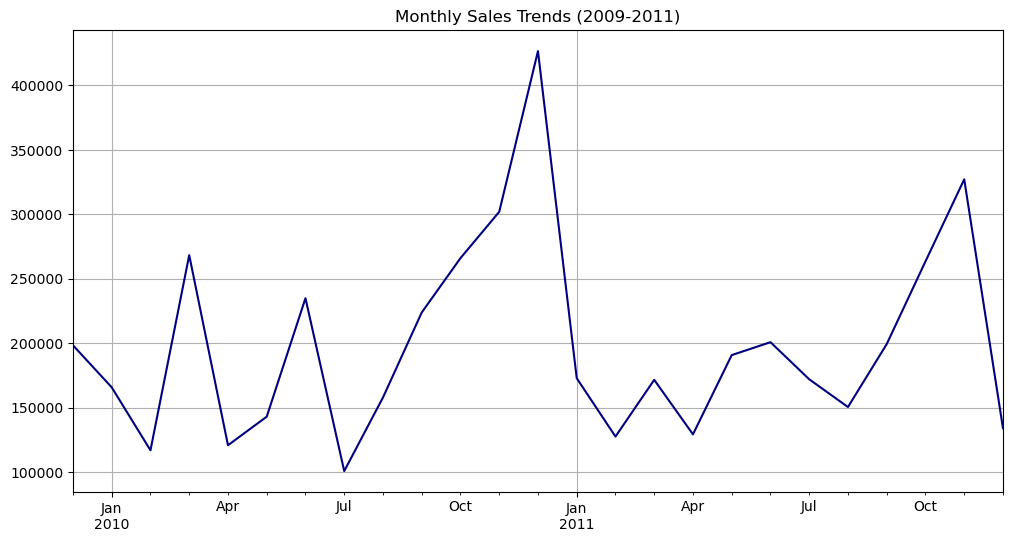

In [133]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
sales_trends = df.groupby('Month')['Price'].sum()

# Plot the sales trends
plt.figure(figsize=(12, 6))
sales_trends.plot(color="navy")
plt.title('Monthly Sales Trends (2009-2011)')
plt.xlabel('')
plt.ylabel('')
plt.grid()
plt.show()

# Alternate monthly sales comparison of the years

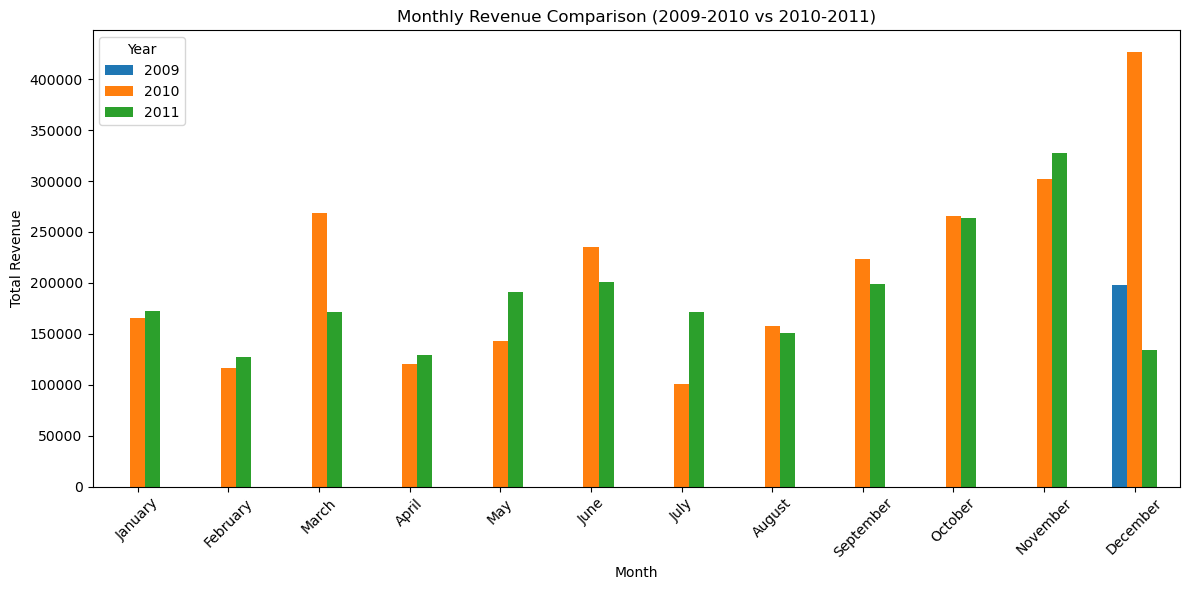

In [57]:
df['Month'] = df['InvoiceDate'].dt.month_name()
monthly_revenue = df.groupby(['Month', df['InvoiceDate'].dt.year]).agg({'Price': 'sum'}).unstack()
monthly_revenue.columns = monthly_revenue.columns.droplevel(0)
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(ordered_months)
# Plot
monthly_revenue.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Revenue Comparison (2009-2010 vs 2010-2011)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Product Performance Evaluation

In [23]:
product_performance = df.groupby('Description').agg({'Price': 'sum', 'Quantity': 'sum'}).reset_index()
product_performance.columns = ['Description', 'Total Revenue', 'Total Quantity']

# Get top and bottom products
top_products = product_performance.sort_values(by='Total Revenue', ascending=False).head(10)
bottom_products = product_performance.sort_values(by='Total Revenue').head(10)

print("Top Products:\n", top_products)
print("\n Bottom Products:\n", bottom_products)

Top Products:
                              Description  Total Revenue  Total Quantity
2991                              Manual     751406.150            4612
238                           AMAZON FEE     328781.840             -35
1472                      DOTCOM POSTAGE     322667.490            1438
3690                             POSTAGE      69226.690            5158
3916            REGENCY CAKESTAND 3 TIER      61747.010           26126
842                         Bank Charges      34492.551             -40
5267  WHITE HANGING HEART T-LIGHT HOLDER      18488.350           93050
3835            RED RETROSPOT CAKE STAND      16185.850            4267
4516    SET/4 WHITE RETRO STORAGE CUBES       15856.610             982
3295                       PARTY BUNTING      15790.750           28110

 Bottom Products:
                 Description  Total Revenue  Total Quantity
382         Adjust bad debt     -147614.08               6
5533      code mix up 72597           0.00            -

# Country-wise Sales Analysis

In [37]:
country_sales = df.groupby('Country').agg({'Price': 'sum', 'Quantity': 'sum'}).reset_index()
country_sales.columns = ['Country', 'Total Revenue', 'Total Quantity']
print(country_sales.sort_values(by='Total Revenue', ascending=False))

                 Country  Total Revenue  Total Quantity
40        United Kingdom    4453169.287         8692875
11                  EIRE     125305.450          331341
15               Germany      67564.451          224581
14                France      67231.310          184952
28                Norway      41129.910           27110
33             Singapore      25481.400            6987
17             Hong Kong      20956.880            7075
34                 Spain      20539.470           45156
30              Portugal      17125.840           28058
26           Netherlands      15663.230          381951
3                Belgium      14766.880           35132
36           Switzerland      12049.880           52378
7        Channel Islands       9056.800           20473
35                Sweden       8709.920           87875
20                 Italy       8479.460           15309
0              Australia       8111.070          103706
25                 Malta       6575.590         

# Visualising Revenue generated by each country

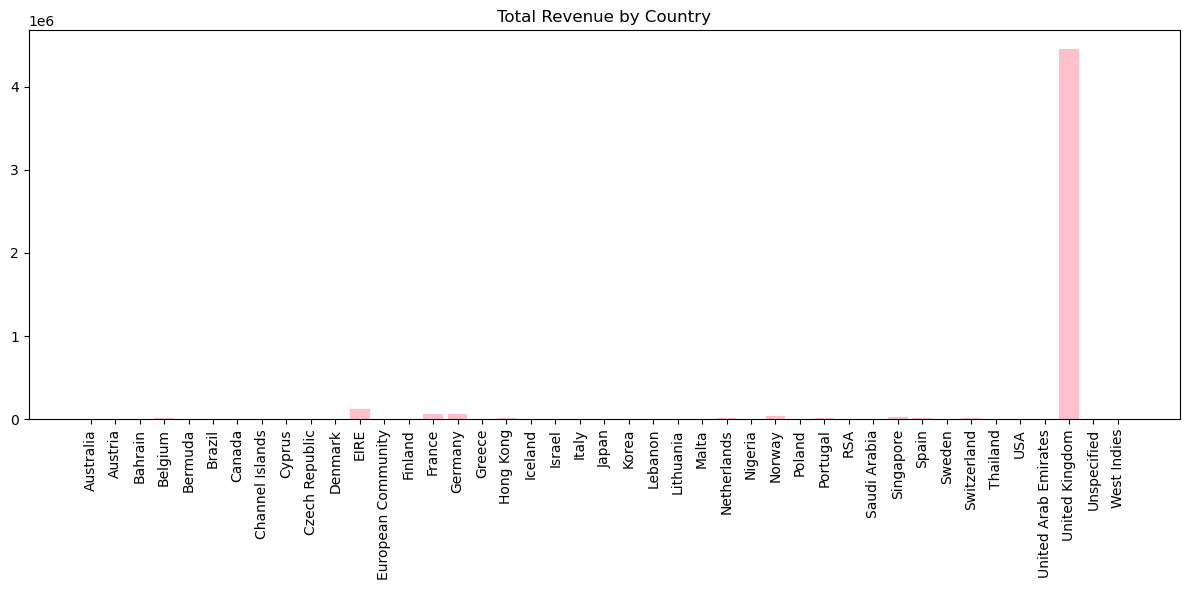

In [128]:
plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'], country_sales['Total Revenue'], color='pink')
plt.title('Total Revenue by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#  Customer Purchase Frequency Analysis

In [48]:
purchase_frequency = df.groupby('Customer ID')['Invoice'].count().reset_index()
purchase_frequency.columns = ['Customer ID', 'Frequency']
print(purchase_frequency.sort_values(by='Frequency', ascending=False).head(10))

     Customer ID  Frequency
5942     Unknown     243007
5495     17841.0      13097
2565     14911.0      11613
402      12748.0       7307
2260     14606.0       6709
1750     14096.0       5128
2965     15311.0       4717
1810     14156.0       4130
2300     14646.0       3890
743      13089.0       3438


# Customer Classification based on Expenditure

In [134]:
customer_segmentation = df.groupby('Customer ID').agg({'Price': 'sum', 'Invoice': 'count'}).reset_index()
customer_segmentation.columns = ['Customer ID', 'Total Spend', 'Purchase Frequency']

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
customer_segmentation['Segment'] = kmeans.fit_predict(customer_segmentation[['Total Spend', 'Purchase Frequency']])
customer_segmentation['Segment'] = customer_segmentation['Segment'].map({0: 'High Spenders', 1: 'Moderate Spenders', 2: 'Low Spenders'})
print(customer_segmentation.head())


  Customer ID  Total Spend  Purchase Frequency        Segment
0     12346.0       580.44                  48  High Spenders
1     12347.0       644.16                 253  High Spenders
2     12348.0       193.10                  51  High Spenders
3     12349.0      1504.59                 180  High Spenders
4     12350.0        65.30                  17  High Spenders


#  Top 10 Selling Products

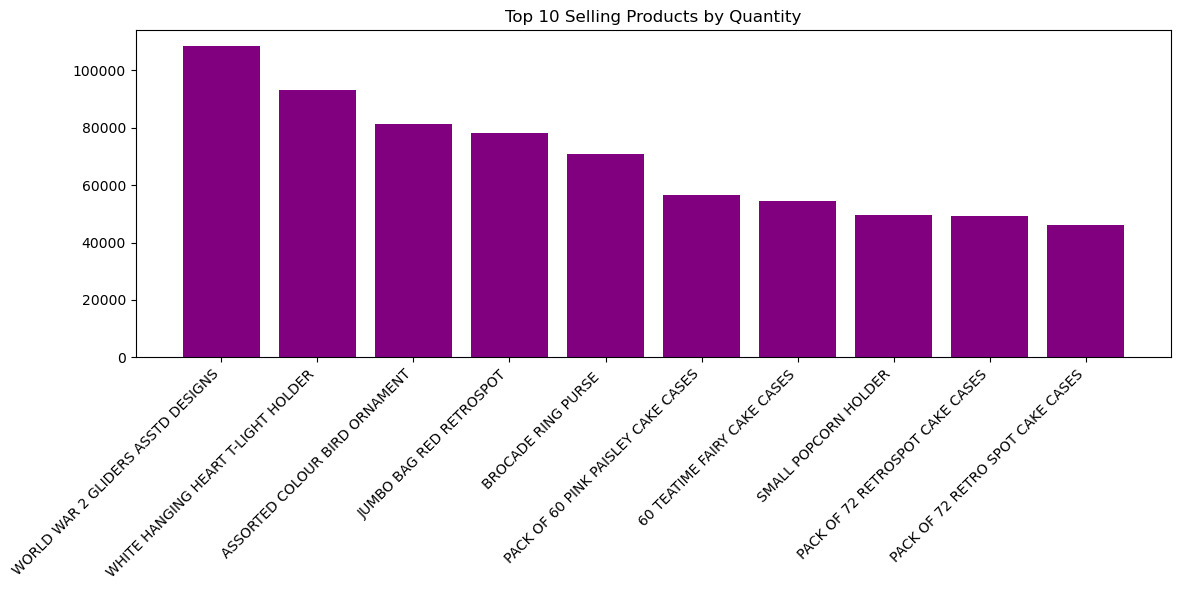

In [62]:
top_products = df.groupby('Description').agg({'Quantity': 'sum'}).nlargest(10, 'Quantity').reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_products['Description'], top_products['Quantity'], color="purple") 

# Title and labels
plt.title('Top 10 Selling Products by Quantity')

# Improve x-tick alignment
plt.xticks(rotation=45, ha='right')  # Rotate labels and set horizontal alignment to the right
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Revenue Contribution by products

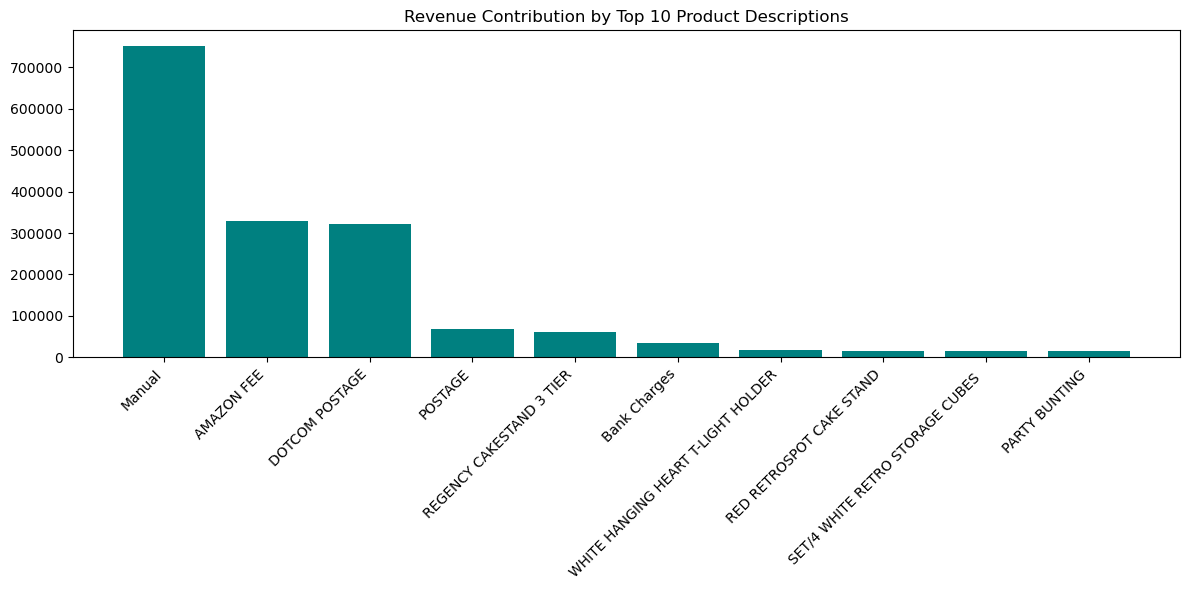

In [82]:
top_description_revenue = df.groupby('Description').agg({'Price': 'sum'}).nlargest(10, 'Price').reset_index()

plt.figure(figsize=(12, 6))
plt.bar(top_description_revenue['Description'], top_description_revenue['Price'], color='teal')
plt.title('Revenue Contribution by Top 10 Product Descriptions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


# Cumulative Revenue Over Time

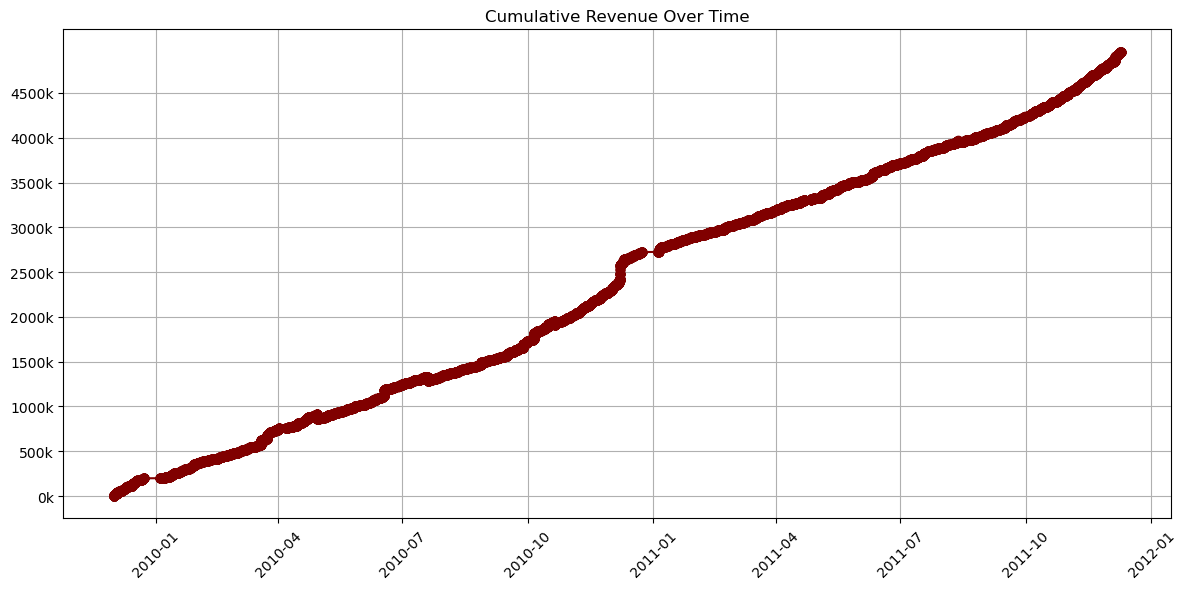

In [98]:
import matplotlib.ticker as ticker

# Grouping and calculating cumulative revenue
cumulative_revenue = df.groupby('InvoiceDate').agg({'Price': 'sum'}).cumsum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue['InvoiceDate'], cumulative_revenue['Price'], marker='o', color='maroon')
plt.title('Cumulative Revenue Over Time')

# Formatting the y-axis to display values in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda n, _: f'{int(n / 1000)}k'))

# Optionally set y-ticks to show only relevant values
plt.gca().set_yticks([i * 1000 for i in range(0, int(cumulative_revenue['Price'].max() / 1000) + 1, 500)])

plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


# Total Sales per each day of the week

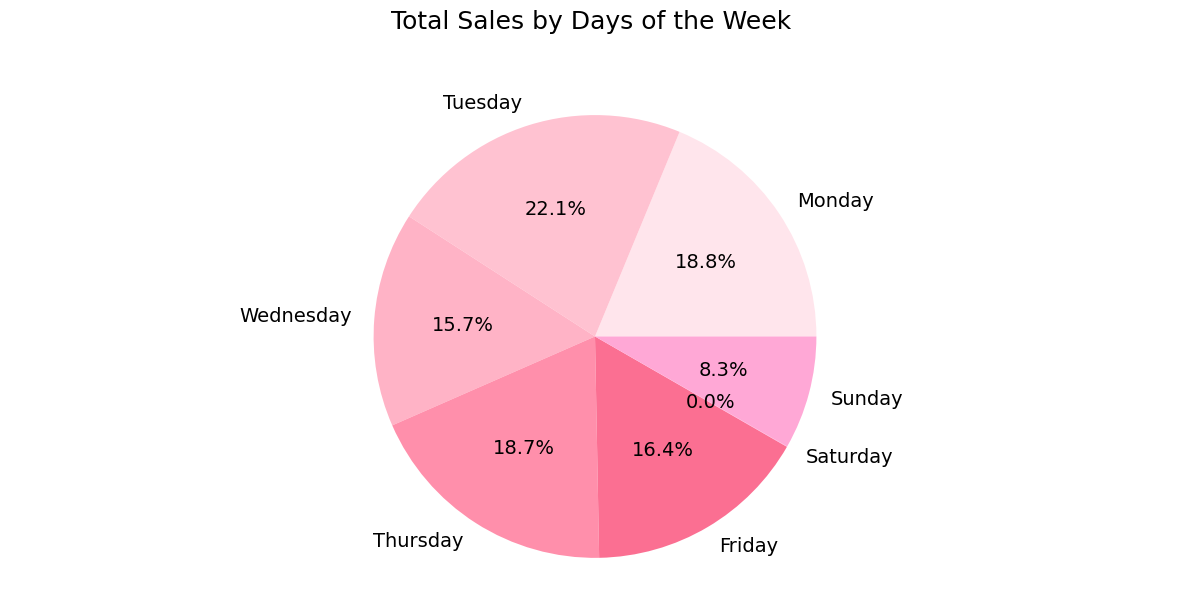

In [135]:
# Define color palette
color_palette = ['#ffe5ec', '#ffc2d1', '#ffb3c6', '#ff8fab', '#fb6f92', '#ff99cc', '#ffa8d6']

df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
weekly_sales = df.groupby('DayOfWeek').agg({'Price': 'sum'}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(12, 6))
plt.pie(weekly_sales['Price'], 
        labels=weekly_sales['DayOfWeek'], 
        autopct='%1.1f%%', 
        textprops={'size': 14}, 
        colors=color_palette)

plt.title('Total Sales by Days of the Week \n \n', fontsize=18)
plt.axis('equal')  
plt.tight_layout()
plt.show()